In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [62]:
house_df = pd.read_csv("complete_houses_mod.csv", index_col="id")

In [6]:
house_df.shape

(9344, 16)

In [7]:
house_df.columns

Index(['Unnamed: 0', 'Zip', 'Price', 'Price of square meter', 'Living area',
       'Number of rooms', 'Garden surface', 'Terrace surface', 'Open fire',
       'Surface of the land', 'Number of facades', 'Swimming pool',
       'Building Cond. values', 'Kitchen values', 'Primary energy consumption',
       'Energy efficiency'],
      dtype='object')

In [8]:
house_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9344.0,4671.500000,2697.524791,0.00,2335.75,4671.5,7007.25,9343.0
Zip,9344.0,5029.633562,2987.545825,1000.00,2018.00,4500.0,8200.00,9992.0
Price,9344.0,481707.847603,370932.451928,10000.00,250000.00,380000.0,570000.00,2500000.0
Price of square meter,9344.0,2220.248567,4235.489422,2.45,1500.00,2000.0,2650.00,399000.0
Living area,9344.0,245.172089,1827.497914,1.00,145.00,189.0,260.00,175173.0
Number of rooms,9344.0,3.739084,1.574912,1.00,3.00,3.0,4.00,25.0
Garden surface,9344.0,444.880244,9447.784677,0.00,0.00,48.0,270.00,900000.0
Terrace surface,9344.0,20.826413,52.765906,0.00,0.00,12.0,26.00,3286.0
Open fire,9344.0,0.091396,0.318529,0.00,0.00,0.0,0.00,10.0
Surface of the land,9344.0,1205.644906,5047.819027,1.00,210.00,460.5,972.00,291294.0


In [63]:
# house_df.drop('Unnamed: 0', inplace=True, axis=1)
# house_df.drop("Price of square meter", inplace=True, axis=1)

In [64]:
from typing import List
# Remove outliers
def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [78]:
# house_df = remove_outliers(house_df, ['Living area','Surface of the land'], 2)
# house_df = remove_outliers(house_df, ['Garden surface','Terrace surface'], 2)

Working on column: Living area
Working on column: Surface of the land
Working on column: Garden surface
Working on column: Terrace surface


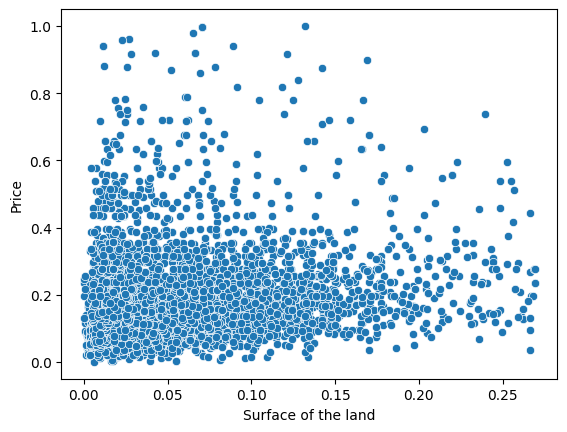

In [79]:
sns.scatterplot(x='Surface of the land', y="Price", data=house_df)
plt.show()

In [80]:
trans = MinMaxScaler()
d = trans.fit_transform(house_df)
house_df = pd.DataFrame(d, columns=house_df.columns)
print(house_df)

           Zip     Price  Living area  Number of rooms  Garden surface  \
0     0.085632  0.136145     0.375262         0.166667        0.139535   
1     0.800712  0.246988     0.385744         0.166667        0.372093   
2     0.344751  0.055823     0.218029         0.083333        0.023256   
3     0.478203  0.130522     0.436059         0.250000        0.649302   
4     0.021130  0.214859     0.530398         0.250000        0.000000   
...        ...       ...          ...              ...             ...   
7628  0.280249  0.149490     0.339623         0.166667        0.377674   
7629  0.280249  0.149592     0.339623         0.166667        0.376744   
7630  0.280249  0.150229     0.339623         0.166667        0.376744   
7631  0.837411  0.159036     0.385744         0.166667        0.000000   
7632  0.997665  0.168072     0.522013         0.166667        0.390698   

      Terrace surface  Open fire  Surface of the land  Number of facades  \
0            0.462963        0.0   

In [137]:
y = house_df[['Price']]
X = house_df[[
       'Building Cond. values',
       'Number of facades',
       'Number of rooms',
       'Living area',
       'Kitchen values',
       'Surface of the land',
       'Terrace surface',
       # 'Garden surface',
       'Open fire',
       'Swimming pool'
       ]]

In [138]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7) 

In [139]:
# min_max_scaler = MinMaxScaler()
# X_train_minmax = min_max_scaler.fit_transform(X_train)
# X_train_minmax

# d = preprocessing.normalize(X_train)
# scaled_df = pd.DataFrame(d, columns=X_train.columns)
# print(scaled_df)

# scaler = preprocessing.MinMaxScaler()
# d = scaler.fit_transform(X_train)
# scaled_df = pd.DataFrame(d, columns=X_train.columns)
# print(scaled_df)

# trans = MinMaxScaler()
# X_train = trans.fit_transform(X_train)

In [140]:
from sklearn.metrics import mean_squared_error, r2_score

regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

y_predicted = regression_model.predict(X_test)

rmse = mean_squared_error(y_test, y_predicted)

r2 = r2_score(y_test, y_predicted)

print(r2)

0.4510375565242478


In [141]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# regression_model = LogisticRegression()

# regression_model.fit(X_train, y_train)

# y_predicted = regression_model.predict(X_test)

# confusion_matrix = confusion_matrix(y_test, y_predicted)

# print(confusion_matrix)
# print(classification_report(y_test, y_predicted))

In [142]:
for idx, name in enumerate(scaled_df):
    print(f"Feature '{name}' has mean {scaled_df[name].mean()} and standard deviation {scaled_df[name].std()}")

Feature 'Living area' has mean 0.4037381660406874 and standard deviation 0.16782098290529007
Feature 'Surface of the land' has mean 0.17602331419405143 and standard deviation 0.16535112592261295


In [143]:
lm = LinearRegression() 

reg = lm.fit(X_train,y_train)

reg.score(X, y)

0.44892531986039197

In [144]:
coeff_df = pd.DataFrame(lm.coef_.T,X.columns,columns=['Coefficient'])

In [145]:
coeff_df

,Coefficient
Building Cond. values,0.071776
Number of facades,0.023338
Number of rooms,0.092995
Living area,0.335823
Kitchen values,0.051171
Surface of the land,0.026908
Terrace surface,0.006536
Open fire,0.286002
Swimming pool,0.039991


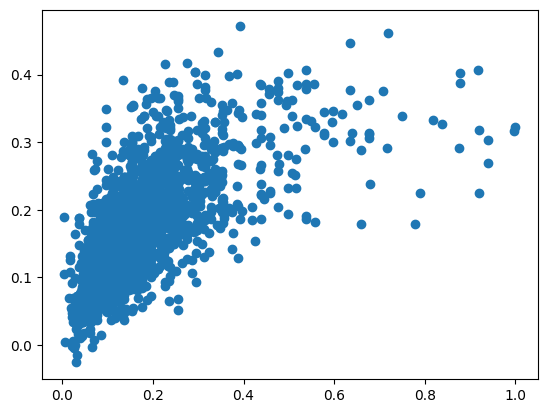

In [146]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

<Axes: xlabel='Price'>

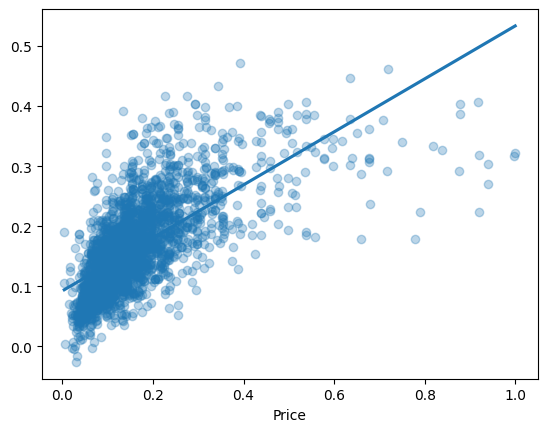

In [147]:
sns.regplot(x=y_test,y=predictions,ci=None,scatter_kws={'alpha': 0.3})

/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_49648/1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: ylabel='Density'>

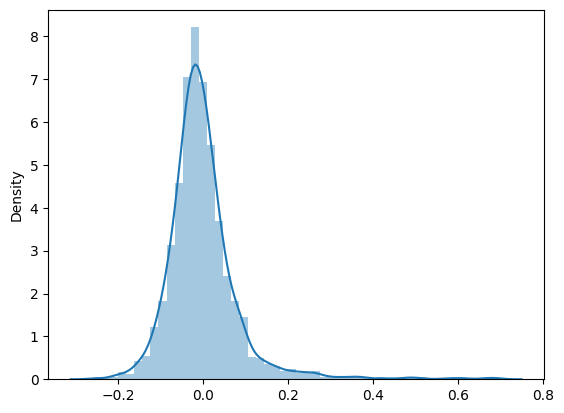

In [148]:
sns.distplot((y_test-predictions),bins=50)